In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [5]:
from rdkit.Chem import PandasTools, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# 1 Data preparation

## 1.1 Basics
First, read the csv and molecules to dataframe.
Then add molecular objects to the frame

In [6]:
TESTED_MOLECULE_PATH = "tested_molecules-1.csv"
tested_molecules = pd.read_csv(os.path.join(os.getcwd(), TESTED_MOLECULE_PATH))
PandasTools.AddMoleculeColumnToFrame(tested_molecules, smilesCol='SMILES')
tested_molecules.head()

,SMILES,ALDH1_inhibition,ROMol
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...


Molecules with ALDH1 inhibtion

c:\ProgramData\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 15. Change the maxMols value to display more.
  warnings.warn(


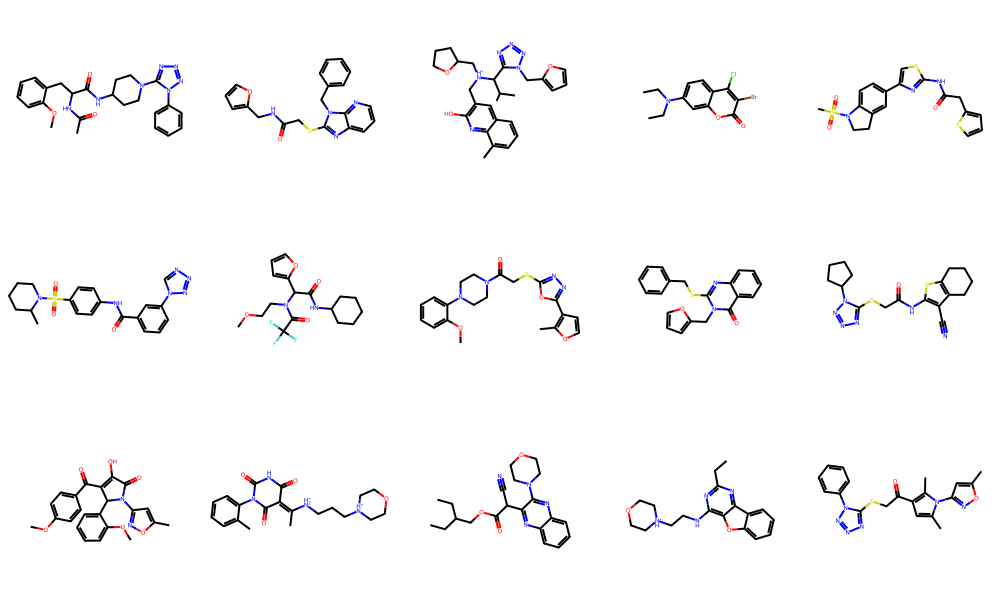

In [7]:
PandasTools.FrameToGridImage(tested_molecules[tested_molecules['ALDH1_inhibition']==1], molsPerRow=5, maxMols=15)

Molecules without ALDH1 inhibtion

c:\ProgramData\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 15. Change the maxMols value to display more.
  warnings.warn(


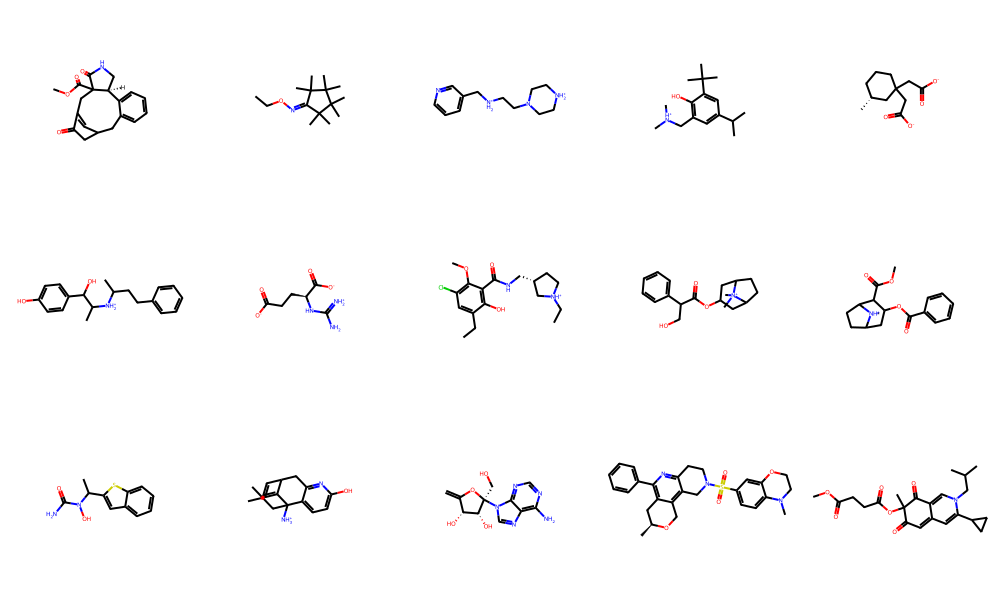

In [8]:
PandasTools.FrameToGridImage(tested_molecules[tested_molecules['ALDH1_inhibition']==0], molsPerRow=5, maxMols=15)

Make a list of all molecular descriptors and instantiate a calculator.
Next all descriptors are being calculated for each molecule. This list is appended to the dataframe

In [9]:
desc_list = [n[0] for n in Descriptors._descList[:]]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
rdkit_desc = [calc.CalcDescriptors(m) for m in tested_molecules["ROMol"]]
desc = pd.DataFrame(rdkit_desc, columns=[desc_list])

In [10]:
desc.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0


Alle descriptors are being scaled and ALDH1_inhibition is added as a column

## 1.2 Normalisation

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(desc) 
desc_scaled = pd.DataFrame(arr_scaled, columns=desc.columns, index=desc.index)
desc_scaled['ALDH1_inhibition'] = tested_molecules['ALDH1_inhibition']

In [12]:
desc_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ALDH1_inhibition
0,0.883077,0.883077,0.001001,0.732144,0.492906,0.688495,0.667061,0.688303,0.756098,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.807622,0.807622,0.057684,0.821655,0.466743,0.501554,0.501533,0.501222,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.703186,0.703186,0.014533,0.828931,0.326910,0.719358,0.689464,0.719134,0.792683,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.757426,0.757426,0.233129,0.765366,0.823627,0.396428,0.405774,0.393233,0.256098,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.802564,0.802564,0.074898,0.359067,0.693622,0.591847,0.595718,0.591178,0.524390,0.0,...,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.816427,0.816427,0.082102,0.797366,0.803465,0.244151,0.241716,0.244087,0.280488,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0.539698,0.539698,0.170527,0.860138,0.938052,0.235345,0.237260,0.235281,0.268293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,0.685198,0.685198,0.143438,0.777850,0.835602,0.112166,0.120867,0.112141,0.134146,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,0.843391,0.843391,0.056581,0.766362,0.642275,0.532279,0.528305,0.532018,0.548780,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Labels are stored in a np array
Features(all values) are stored in a np array
Feature_list will be used later for the names of the featurs

In [13]:
# Labels are the values we want to predict
labels = np.array(tested_molecules['ALDH1_inhibition'])
# Remove the labels from the features
features = desc_scaled.drop(columns=['ALDH1_inhibition'], axis=1, level = 0)
# Saving feature names for later use in a list
feature_list = list(features.columns)
# Convert features to numpy array
features = np.array(features)

## 1.3 Split dataset
Now a split 0.25 is made in the features in test and a train set

In [14]:
## Split the dataset in train and test
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (750, 209)
Training Labels Shape: (750,)
Testing Features Shape: (250, 209)
Testing Labels Shape: (250,)


# 2 PCA
## 2.1 Cum explained var

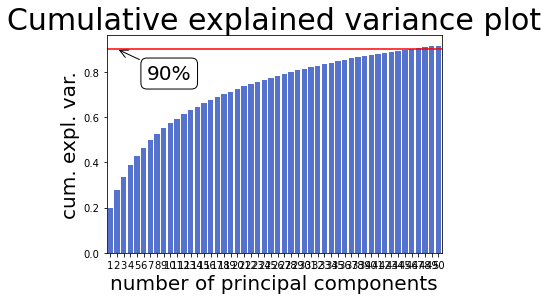

In [15]:
from sklearn.decomposition import PCA
# Create PCA object with nfeatures components
n_comps = 50
pca = PCA(n_components=n_comps);
# Fit the model with data
pca.fit(features);

features_pca = pca.transform(features);
cs = pca.explained_variance_ratio_.cumsum();

fig, ax = plt.subplots(1,1)
ax = sns.barplot(x=list(range(1,n_comps+1)),y=cs, ax=ax, color='royalblue');
ax.set_title('Cumulative explained variance plot', fontsize=30);
ax.set_xlabel('number of principal components', fontsize=20);ax.set_ylabel('cum. expl. var.', fontsize=20);
ax.axhline(0.9, color='red')

annot = ax.annotate("90%", xy=(1,0.9), xytext=(30,-30),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"), fontsize=20)
fig.savefig('cum_distribution.png', dpi=300, bbox_inches='tight')

# 2.2 New PCA with 10 PCs

In [16]:
n_components = 8
pca = PCA(n_components=n_components);
pca.fit(train_features);
cs = pca.explained_variance_ratio_.cumsum();

# Loadings

In [17]:
loadings = pca.components_    ## 10 * n_components loadings array
loadings_df_columns = [f'PC{i}' for i in range(1, n_components + 1)]
loadings_df = pd.DataFrame(data=np.transpose(loadings), index=feature_list, columns=loadings_df_columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
"(MaxAbsEStateIndex,)",0.093860,0.040125,0.094321,0.098769,-0.090900,0.057202,-0.101888,0.067717
"(MaxEStateIndex,)",0.093860,0.040125,0.094321,0.098769,-0.090900,0.057202,-0.101888,0.067717
"(MinAbsEStateIndex,)",-0.061214,-0.053531,-0.061091,-0.088429,0.061079,-0.048634,0.066034,-0.002607
"(MinEStateIndex,)",-0.073850,-0.071205,-0.128365,-0.096438,0.189396,0.289550,0.125303,-0.059515
"(qed,)",-0.105926,0.065597,-0.058102,-0.106216,-0.085881,-0.092599,-0.051408,0.079997
...,...,...,...,...,...,...,...,...
"(fr_thiazole,)",-0.002329,-0.051216,-0.040607,0.037380,-0.034185,-0.026360,-0.009173,-0.091136
"(fr_thiocyan,)",-0.003458,-0.000855,0.000176,-0.001849,-0.000415,-0.001984,0.000539,-0.000796
"(fr_thiophene,)",0.007681,-0.020392,-0.061130,0.066756,-0.065158,0.023716,0.032988,-0.098917
"(fr_unbrch_alkane,)",0.006727,0.008459,0.002456,0.005456,0.015486,-0.007906,0.026459,-0.016153


Create a loading plot

In [18]:
#fig, ax = plt.subplots(1,1)

#for i, varnames in enumerate(train_features):
    #plt.scatter(loadings[0][i], loadings[1][i], s=200);
    #plt.text(loadings[0][i], loadings[1][i], varnames, fontsize=20);
    
#ax.set_title("Loading plot on dataset", fontsize=30);
#ax.legend(features.columns, bbox_to_anchor=(1.3, 1.02), loc="upper right", fontsize=20);
#ax.set_xlabel("loadings on PC1 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[0]), fontsize=20);
#ax.set_ylabel("loadings on PC2 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[1]), fontsize=20);


In [19]:
#fig.savefig('loading_plot.png', dpi=300, bbox_inches='tight')

Create a Score plot

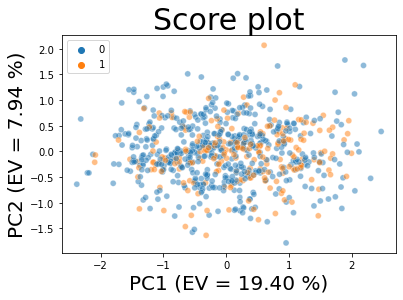

In [20]:
fig = plt.figure()

train_features_reduced = pca.fit_transform(train_features)
train_features
ax = fig.add_subplot()
ax = sns.scatterplot(x = train_features_reduced[:,0], y = train_features_reduced[:,1], hue = train_labels, alpha = 0.5)

#for i, feature in enumerate(train_features):
   # plt.arrow(0, 0, loadings[0, i]*2, loadings[1, i]*2, color='r', alpha=0.5)
   # plt.text(loadings[0, i]*2, loadings[1, i]*2, feature, color='k', fontsize=20)

plt.title("Score plot", fontsize=30);
ax.set_xlabel("PC1 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[0]), fontsize=20);
ax.set_ylabel("PC2 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[1]), fontsize=20);
fig.savefig('score_plot.png', dpi=300, bbox_inches='tight')

This leads nowhere !

# 3 Common characteristics (Tanamoto)

## 3.1 Intro (test molecuul 750 op similiarity in de hele set)

Select reference molecule

In [21]:
from rdkit.Chem import AllChem
ref_smiles = tested_molecules.iloc[750]['SMILES']
ref_mol = AllChem.MolFromSmiles(ref_smiles)
ref_ECFP4_fps = AllChem.GetMorganFingerprintAsBitVect(ref_mol,2)

Select the other molecules

In [22]:
bulk_ECFP4_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in tested_molecules['ROMol']]

Calculate fingerprint ('Tanimoto') similarity between ref and others

In [23]:
from rdkit import DataStructs
similarity_efcp4 = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps,x) for x in bulk_ECFP4_fps]

Copy the others and add column with Tanimoto Similarity

In [24]:
group_compared_to_referce = tested_molecules.copy()
group_compared_to_referce['Tanimoto_Similarity (ECFP4)'] = similarity_efcp4

Sort the result and show (The result of the first molecule is alway 1.0 since its the molecule itself :-) )

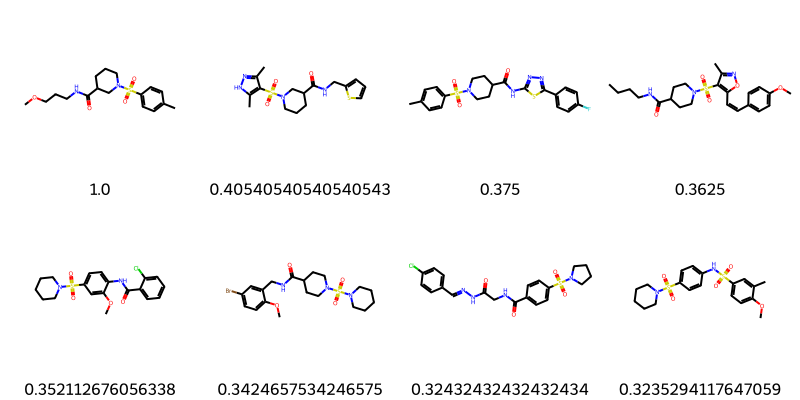

In [25]:
group_compared_to_referce = group_compared_to_referce.sort_values(['Tanimoto_Similarity (ECFP4)'], ascending=False)
PandasTools.FrameToGridImage(group_compared_to_referce.head(8), legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)

In [26]:
group_compared_to_referce['ALDH1_inhibition'].head(8)

750    0
860    0
616    0
707    0
79     1
40     1
599    0
92     1
Name: ALDH1_inhibition, dtype: int64

## 3.2 Similarity (check test molecule to training set of positives and negatives)

### Strategy
Divide the dataset ALDH1 inhibitors and not ALDH1 inhibitors. 
Compare test molecule to all molecules in set 1
Compare test molecule to alle molecules in set 2
Attribute ALDH1_inhibition estimator of test molecule to the group with highest total score. 
Make confusion matrix of result

Create a test- and train set

In [27]:
train_set, test_set = train_test_split(tested_molecules, test_size = 0.5, random_state = 99)

Divide training set in positives and negatives

In [28]:
train_set_pos = train_set[train_set['ALDH1_inhibition'] == 1]
train_set_neg = train_set[train_set['ALDH1_inhibition'] == 0]
print("Number of positives in train set: {}".format(len(train_set_pos)))
print("Number of negatives in train set: {}".format(len(train_set_neg)))

Number of positives in train set: 157
Number of negatives in train set: 343


Create Bulk frame of positives and negatives by GetMorganFingerprintAsBitVec and determine both lenths

In [29]:
bulk_ECFP4_fps_pos = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in train_set_pos['ROMol']]
bulk_ECFP4_fps_neg = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in train_set_neg['ROMol']]
len_pos = len(bulk_ECFP4_fps_pos)
len_neg = len(bulk_ECFP4_fps_neg)

Make copy to iterate (could not append columns otherwise...)

In [30]:
test_set_copy = test_set.copy(deep=False)

Perform the iteration for all molecules from test set

In [31]:
# Loop all rows from test set
for index, row in test_set.iterrows():    
    test_smiles = row['SMILES']
    # Make allchem MolFrom the SMILES and convert it into to GetMorganFingerprintAsBitVec
    test_mol = AllChem.MolFromSmiles(test_smiles)
    ref_ECFP4_fps = AllChem.GetMorganFingerprintAsBitVect(test_mol,2)
    # Calculate similarities with positives and negative
    similarity_efcp4_pos = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps,x) for x in bulk_ECFP4_fps_pos]
    similarity_efcp4_neg = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps,x) for x in bulk_ECFP4_fps_neg]
    rel_sum_pos = sum(similarity_efcp4_pos)/len_pos # divide by sizes to normalize the result
    rel_sum_neg = sum(similarity_efcp4_neg)/len_neg # dito
    
   # Determine a predidicion and add it to the dataframe
    if rel_sum_pos > rel_sum_neg:
        test_set_copy.loc[index, ['PREDICT']] = np.int64(1)
    else:
        test_set_copy.loc[index, ['PREDICT']]= np.int64(0)
        
test_set_copy.head()


,SMILES,ALDH1_inhibition,ROMol,PREDICT
890,COc1cc(NS(=O)(=O)c2ccc(F)cc2)c(C(=O)[O-])cc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...,0.0
983,CCC(C)(C)n1nnnc1C(c1ccccn1)[NH+]1CCOCC1,0,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...,0.0
107,N#Cc1c(SCC(=O)[O-])nc(-c2ccccc2)c2c1CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...,0.0
609,CC(C)c1onc(C(=O)NCc2ccc(F)cc2)c1[N+](=O)[O-],0,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...,0.0
113,CN(C)c1ccc(N2C[NH+]=C3SCC(=O)N3C2)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x0000026ECDE...,0.0


Generate a confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
pred = list(test_set_copy['PREDICT'])
true = list(test_set_copy['ALDH1_inhibition'])
tn, fp, fn, tp = confusion_matrix(pred, true).ravel()
(tn, fp, fn, tp)
sensitivity = tp/(tp+fp) 
specificity = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("sn: {:.2f}, sp: {:.2f}, acc: {:.2f}".format(sensitivity, specificity, accuracy))

sn: 0.44, sp: 0.76, acc: 0.64


Sensitivity mediocre, Specifity ok, Accuracy mediocre. Again (beter result than RF). Maybo lower sn is not bad in this case. We want to select candidates so false positive is not a bad thing.

# 4 Random Forrest
Create a random forrest and fit it to train data

In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

Iterate the TRAIN data and predict the ALDH label

In [34]:
pred = []
true = []

for i in range(len(train_features)):
    pred.append(rf.predict([list(train_features[i])]))
    true.append(train_labels[i])

Create a confusion matrix and display sensitivity, specificity, accuracy

In [35]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, true).ravel()
(tn, fp, fn, tp)
sensitivity = tp/(tp+fp) 
specificity = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(sensitivity, specificity, accuracy)

1.0 1.0 1.0


The result is not surprising, since predicions were made on the train data.
No same for te test set...

In [36]:
pred = []
true = []

for i in range(len(test_features)):
    pred.append(rf.predict([list(test_features[i])]))
    true.append(test_labels[i])

In [37]:
tn, fp, fn, tp = confusion_matrix(pred, true).ravel()
(tn, fp, fn, tp)
sensitivity = tp/(tp+fp) 
specificity = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("sn: {:.2f}, sp: {:.2f}, acc: {:.2f}".format(sensitivity, specificity, accuracy))


sn: 0.06, sp: 0.70, acc: 0.69


Very low sensitivity, mediocre specifitity and accuracy..
Maybe not so bad! We want to make a selection of canditates. There will be a lot of false positives, but 70% chance we will not overlook candidates.
Not sure about this btw...
ALL descriptors were used btw, maybe stripping some helps, but which ones??